In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "matplotlib_challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "matplotlib_challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pyma_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])


# Display the data table for preview
pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#Checking the # of mice
mice_count = mouse_metadata["Mouse ID"].unique().size

mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = pyma_df.duplicated(subset=["Mouse ID", "Timepoint"])

dup_mouseid = pyma_df.loc[duplicate_mouse, 'Mouse ID'].unique()

dup_mouseid

array(['g989'], dtype=object)

In [4]:
pyma_df.loc[pyma_df["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Create a clean DF

clean_df = pyma_df[pyma_df["Mouse ID"].isin(dup_mouseid)== False]

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
#of mice in clean DF
clean_df["Mouse ID"].unique().size

248

In [7]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
vol_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

vol_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

vol_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

vol_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

vol_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
volume_summary = pd.DataFrame({"Mean Tumor Volume":vol_mean,
                              "Median Tumor Volume":vol_median,
                              "Tumor Volume Variance":vol_var,
                              "Tumor Volume Std Dev":vol_std,
                              "Tumor Volume Std Err":vol_sem})
               
volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
dr_values = clean_df["Drug Regimen"].value_counts()

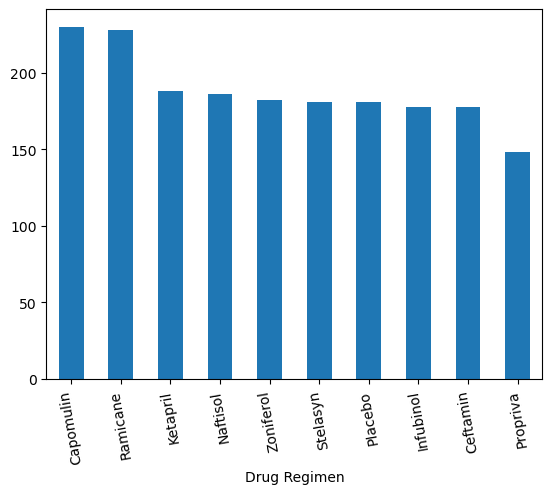

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plot = dr_values.plot.bar(x='Drug Regimen',y='Timepoint', rot=100)


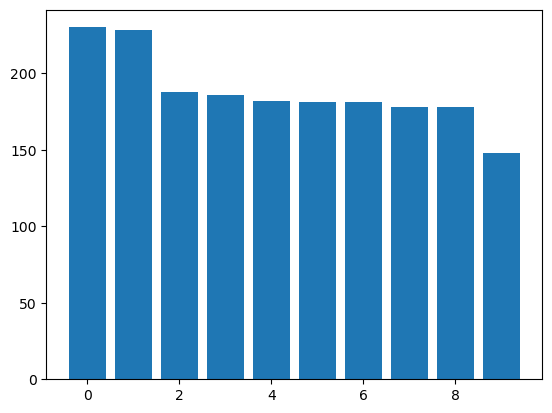

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_pyplot = plt.bar(range(len(dr_values)), dr_values)
plt.show(bar_pyplot)

In [11]:
#Pie Charts column values for Sex of mouse
sex_values = clean_df["Sex"].value_counts()
sex_values

Sex
Male      958
Female    922
Name: count, dtype: int64

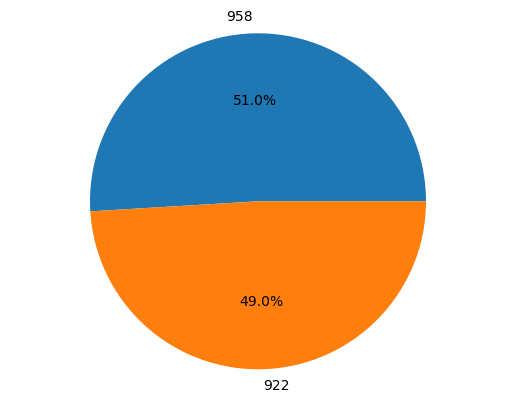

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_values, labels=sex_values,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

<Axes: title={'center': 'Sex'}, ylabel='count'>

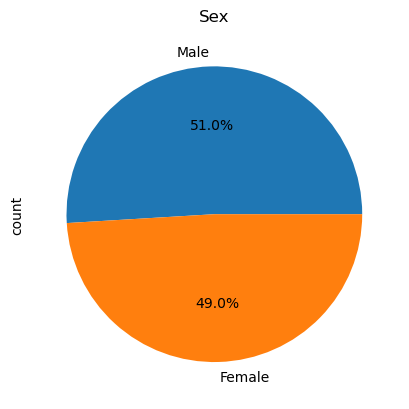

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = sex_values.plot.pie(y='sex_values', title="Sex", autopct='%1.1f%%')
pandas_pie

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_tp = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_max = clean_df.merge(max_tp, on=['Timepoint', 'Mouse ID'])
clean_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

capomulin_vol = clean_max.loc[clean_max["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
tumor_vol_list.append(capomulin_vol)

Ramicane_vol = clean_max.loc[clean_max["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
tumor_vol_list.append(Ramicane_vol)

Infubinol_vol = clean_max.loc[clean_max["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
tumor_vol_list.append(Infubinol_vol )

Ceftamin_vol = clean_max.loc[clean_max["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]
tumor_vol_list.append(Ceftamin_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

    
# add subset 

    
# Determine outliers using upper and lower bounds
  
quartiles = capomulin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Next med
quartiles = Ramicane_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Next med
quartiles = Infubinol_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


#Next med

quartiles = Ceftamin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartil

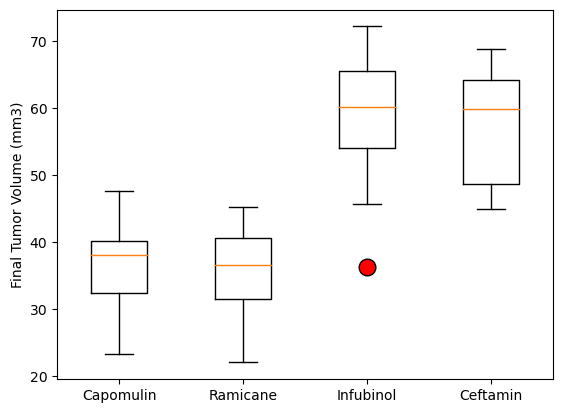

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# fig_box = plt.figure(figsize =(10, 7))
# axis = fig_box.add_axes("Drug Regimen", "Tumor Volume (mm3)")

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = four_regimens,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

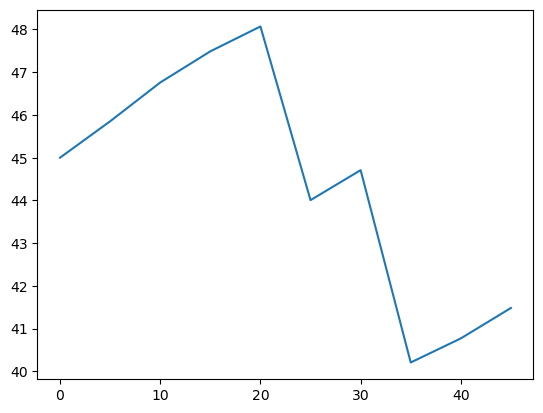

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_vol = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_vol.loc[capomulin_vol['Mouse ID']== 'l509']
capomulin_vol.head()
x = mousedata["Timepoint"]
y = mousedata["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.show()

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

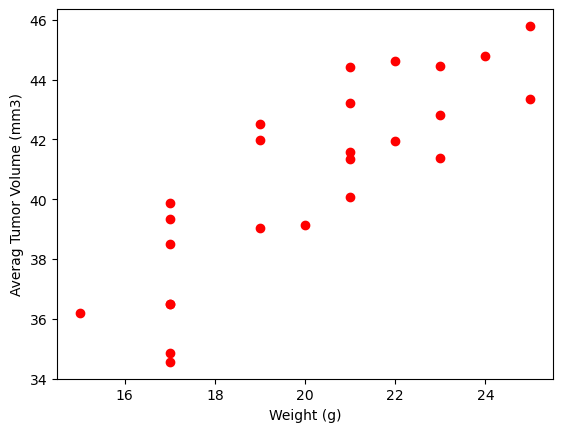

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
cap_vol_avg =capomulin_data.groupby(['Mouse ID'])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(cap_vol_avg["Weight (g)"], cap_vol_avg["Tumor Volume (mm3)"], color="red")

plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Averag Tumor Volume (mm3)')



In [70]:
# Calculate the correlation coefficient and a linear regression model 
x = cap_vol_avg["Weight (g)"]
y = cap_vol_avg["Tumor Volume (mm3)"]
corr_coeff,_ = st.pearsonr(x, y)
message = f"The correlation coefficient between mouse weight and average observed tumor volume for capomulin is {corr_coeff}"
    
print(message)

The correlation coefficient between mouse weight and average observed tumor volume for capomulin is 0.8419363424694721


In [ ]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen